In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

In [5]:
telco= pd.read_csv("telco_csv.csv")
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,0,0,0,1,0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,0,1,1,0,1,1,1,1,0,4
2,3,68,52,1,24,116,1,29,0,1,...,0,0,0,0,1,1,0,1,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,0,0,0,1,0,1,1,0,3


In [41]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
telco_num=telco[numeric_var_names]

In [43]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99), lower=x.quantile(0.01))
    return x
telco_num=telco_num.apply(lambda x: outlier_capping(x))
# telco_num

In [69]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  longmon   1000 non-null   float64
 16  tollmon   1000 non-null   float64
 17  equipmon  1000 non-null   float64
 18  cardmon   1000 non-null   float64
 19  wiremon   1000 non-null   float64
 20  multline  1000 non-null   int64

In [47]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x
telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [55]:
# telco_num.corr()

<Axes: >

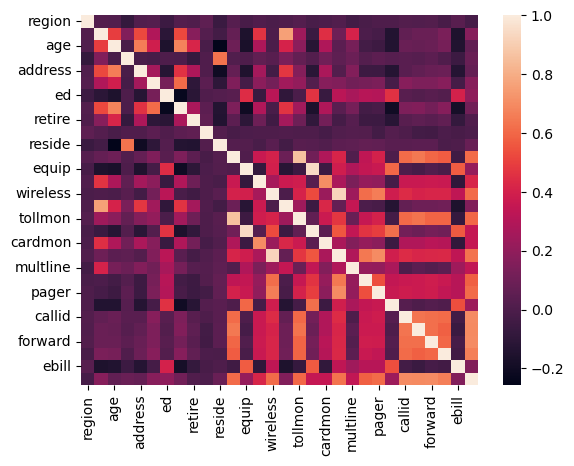

In [57]:
sns.heatmap(telco_num.corr())

In [196]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
telco_scaled=sc.fit_transform(telco_num)
# telco_scaled

In [198]:
from sklearn.decomposition import PCA

In [200]:
pc = PCA(n_components=30)

In [206]:
pc.fit(telco_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [208]:
var

array([0.24688118, 0.16367341, 0.09653286, 0.06053122, 0.04035125,
       0.03599086, 0.03510158, 0.03162522, 0.029569  , 0.02631703,
       0.02253923, 0.02128887, 0.02030049, 0.01793457, 0.0161073 ,
       0.0153155 , 0.0145946 , 0.01454193, 0.01307356, 0.01213719,
       0.01182389, 0.01115274, 0.01008068, 0.00827538, 0.00667226,
       0.00643386, 0.00444643, 0.00351825, 0.00228776, 0.00090188])

In [210]:
var1

array([24.69, 41.06, 50.71, 56.76, 60.8 , 64.4 , 67.91, 71.07, 74.03,
       76.66, 78.91, 81.04, 83.07, 84.86, 86.47, 88.  , 89.46, 90.91,
       92.22, 93.43, 94.61, 95.73, 96.74, 97.57, 98.24, 98.88, 99.32,
       99.67, 99.9 , 99.99])

In [274]:
var_ratio={}
k_range=range(2,31)
for n in k_range:
    pc=PCA(n_components=n)
    telco_pca=pc.fit(telco_scaled)
    var_ratio[n]=sum(telco_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.4105545892182626,
 3: 0.5070872450429413,
 4: 0.5676164044934626,
 5: 0.607964629004438,
 6: 0.6439513962833108,
 7: 0.6789899006771116,
 8: 0.7106680487570157,
 9: 0.7402462768533447,
 10: 0.7665431977862943,
 11: 0.7891028322125698,
 12: 0.8103818013722055,
 13: 0.8306987950892223,
 14: 0.8486327422201142,
 15: 0.8647402904723407,
 16: 0.8800577647699972,
 17: 0.8946538919365827,
 18: 0.9091960763893803,
 19: 0.9222696719778796,
 20: 0.9344068578889739,
 21: 0.9462307443000253,
 22: 0.9573834892165031,
 23: 0.9674641731383157,
 24: 0.9757395487099375,
 25: 0.982411812544932,
 26: 0.9888456774214073,
 27: 0.9932921116210999,
 28: 0.996810362125136,
 29: 0.9990981235320958,
 30: 0.9999999999999998}

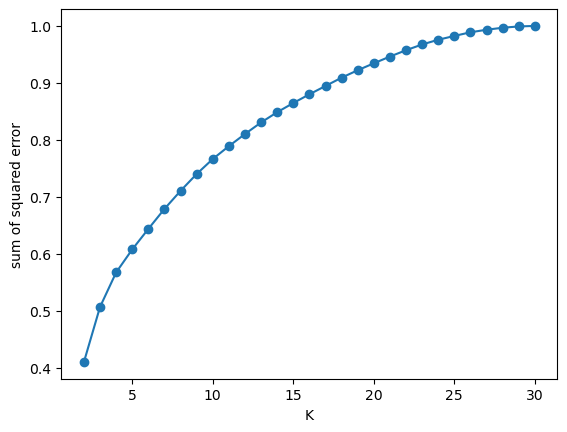

In [282]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_range, var_ratio.values(), marker='o')

In [284]:
threshold = 0.90  # We want at least 90% explained variance
for n, variance in var_ratio.items():
    if variance >= threshold:
        print(f"Optimal number of components to retain {threshold * 100}% variance: {n}")
        break

Optimal number of components to retain 90.0% variance: 18


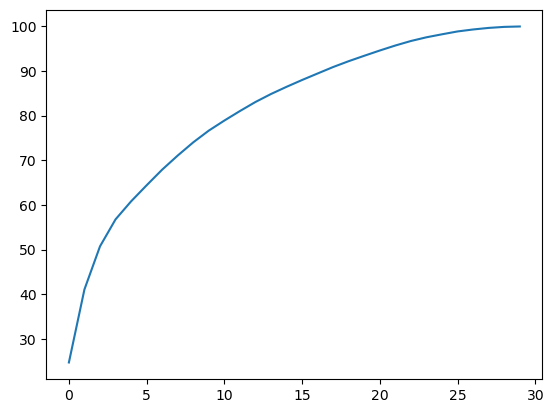

In [244]:
plt.plot(var1)

In [286]:
pc_final=PCA(n_components=18).fit(telco_scaled)

reduced_cr=pc_final.fit_transform(telco_scaled)

In [288]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.600525,0.031015,-0.790329,0.370994,0.208191,-0.682197,0.784458,-0.569240,0.928170,0.142995,1.740657,-0.120605,0.467530,-0.825580,0.269468,0.171461,0.574810,-0.109476
1,3.220805,-0.929948,-2.876114,1.573040,1.397576,-0.062433,-0.076275,-1.447396,0.895539,-1.358964,2.435818,-0.100320,-0.260242,-0.873983,-0.120307,0.388723,0.530474,-0.255479
2,0.695584,3.988701,-0.297025,0.401513,0.659442,0.109791,-1.494137,-0.417398,0.325760,1.041142,-0.691804,-0.064278,0.462270,0.115504,0.174228,-0.352246,-0.476388,-0.250169
3,-3.844349,-0.131951,-0.540179,-1.030007,-0.159137,0.109661,-0.616511,0.866740,-0.115963,-1.100572,-0.418589,-0.576609,0.588943,-0.552760,-0.347345,-0.304707,0.105181,0.332753
4,-1.797360,-0.007887,-2.632727,1.211834,0.216614,0.539875,0.836006,-0.973958,-0.347407,-0.264522,-0.471473,1.844367,0.734302,-0.750307,-0.265929,-1.051971,0.107859,-0.156781


In [290]:
col_list=telco_num.columns
col_list

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'custcat'],
      dtype='object')

In [218]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T

In [220]:
Loadings.to_csv("Loadings.csv")

In [222]:
list_var = ['custcat','pager','wiremon','equipmon','ebill','multline','marital','income','retire','gender','region']

In [224]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
# print(telco_scaled1.head(5))

telco_scaled2=telco_scaled1[list_var]
# print(telco_scaled2.head(5))

In [226]:
from sklearn.cluster import KMeans

In [228]:
km_3=KMeans(n_clusters=3,random_state=123)

In [292]:
km_3.fit(telco_scaled2)

KMeans(n_clusters=3, random_state=123)

In [294]:
pd.Series(km_3.labels_).value_counts()

1    555
0    234
2    211
Name: count, dtype: int64

In [296]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [301]:
# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [303]:
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,ebill,custcat,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,2,13,44.0,1,9,64.0,4,5.0,0,0,...,1,0,0,1,1,1,1,1,1,1
1,3,11,33.0,1,7,136.0,5,5.0,0,0,...,1,1,0,4,0,0,0,0,0,0
2,3,68,52.0,1,24,116.0,1,29.0,0,1,...,0,1,0,3,1,1,1,1,5,1
3,2,33,33.0,0,12,33.0,2,0.0,0,1,...,0,0,0,1,1,3,1,5,5,7
4,2,23,30.0,1,9,30.0,1,2.0,0,0,...,1,1,0,3,1,1,1,1,1,1


In [322]:
print(pd.Series.sort_index(telco_num.cluster_3.value_counts()))
print(pd.Series.sort_index(telco_num.cluster_4.value_counts()))
print(pd.Series.sort_index(telco_num.cluster_5.value_counts()))
print(pd.Series.sort_index(telco_num.cluster_6.value_counts()))
print(pd.Series.sort_index(telco_num.cluster_7.value_counts()))
print(pd.Series.sort_index(telco_num.cluster_8.value_counts()))

cluster_3
0    234
1    555
2    211
Name: count, dtype: int64
cluster_4
0    240
1    258
2    198
3    304
Name: count, dtype: int64
cluster_5
0    219
1    346
2    205
3    183
4     47
Name: count, dtype: int64
cluster_6
0    219
1    164
2    205
3    183
4     47
5    182
Name: count, dtype: int64
cluster_7
0    203
1    164
2    199
3    168
4     47
5    171
6     48
Name: count, dtype: int64
cluster_8
0    197
1    160
2     94
3     47
4    167
5    117
6     45
7    173
Name: count, dtype: int64


In [334]:
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_
telco_num.keys()

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'custcat', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8'],
      dtype='object')

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


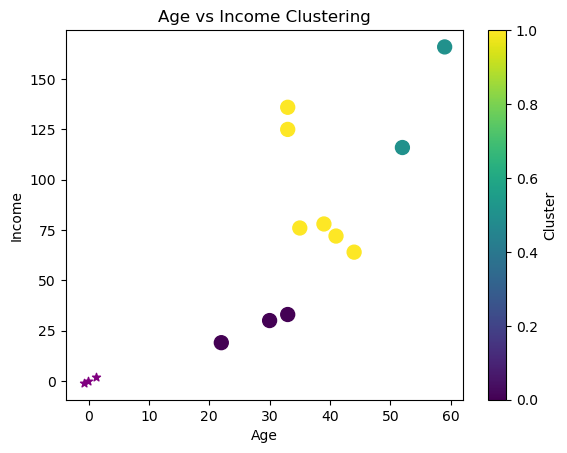

    gender  age  marital  income  Cluster
0        0   44        1      64        2
1        0   33        2     136        2
2        1   52        1     116        1
3        0   33        0      33        0
4        0   30        1      30        0
5        1   39        0      78        2
6        0   22        2      19        0
7        0   35        0      76        2
8        1   59        1     166        1
9        1   41        2      72        2
10       0   33        0     125        2


In [351]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'gender': ['0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0'],
    'age': ['44', '33', '52', '33', '30', '39', '22', '35', '59', '41', '33'],
    'marital': ['1', '2', '1', '0', '1', '0', '2', '0', '1', '2', '0'],
    'income': ['64', '136', '116', '33', '30', '78', '19', '76', '166', '72', '125']
})
# Step 1: Convert columns to numeric
data['gender'] = data['gender'].astype(int)
data['age'] = data['age'].astype(int)
data['marital'] = data['marital'].astype(int)
data['income'] = data['income'].astype(int)

# Step 2: Preprocess data (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 clusters
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize the Clustering Results (Example: Age vs. Income)
plt.scatter(data['age'], data['income'], c=data['Cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Print the clustered DataFrame
print(data)

In [344]:
scaled_data

array([[-0.75592895,  0.57635882,  0.11470787, -0.42401633],
       [-0.75592895, -0.53061606,  1.3764944 ,  1.16755207],
       [ 1.32287566,  1.38143145,  0.11470787,  0.72544974],
       [-0.75592895, -0.53061606, -1.14707867, -1.10927494],
       [-0.75592895, -0.83251829,  0.11470787, -1.17559029],
       [ 1.32287566,  0.07318842, -1.14707867, -0.1145447 ],
       [-0.75592895, -1.63759093,  1.3764944 , -1.41874657],
       [-0.75592895, -0.3293479 , -1.14707867, -0.15875493],
       [ 1.32287566,  2.08587001,  0.11470787,  1.83070557],
       [ 1.32287566,  0.27445658,  1.3764944 , -0.24717539],
       [-0.75592895, -0.53061606, -1.14707867,  0.92439579]])